# **Connecting to the google drive**

In [20]:
# File is stored in the drive so we link the drive to access the file 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing the libraries**

In [21]:
# We import the required modules for machine learning, like numpy, pandas and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the dataset**

In [22]:
# we import the data using pandas module and import the 3rd and 4th column into x and y respectively
data = pd.read_csv('/content/drive/MyDrive/KNN:SVM/Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(data)
print("----------------------------------------------------------------------")
print(x)
print("----------------------------------------------------------------------")
print(y)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
----------------------------------------------------------------------
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [

# **Splitting the data into train and test sets**

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size =0.25, random_state=0)
print(x_train)
print("------------------------------")
print(y_train)
print("------------------------------")
print(x_test)
print("------------------------------")
print(y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

# **Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)
print("--------------------")
print(x_test)


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

#**Training the Decision tree model on the training set**

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# **Predicting the Results**



In [26]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# **Predicting the Results on test set**



In [27]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# **Making the confusion matrix**

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[62  6]
 [ 3 29]]


0.91

# **Visualizing the result from the trainning set**

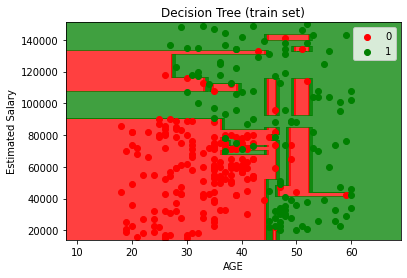

In [29]:
from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_train),y_train
x1,x2= np.meshgrid(np.arange(start = x_set[:,0].min()-10,stop = x_set[:,0].max()+10,step=1),
                   np.arange(start =x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step=1))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (train set)')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# **Visualizing the result from the test set**

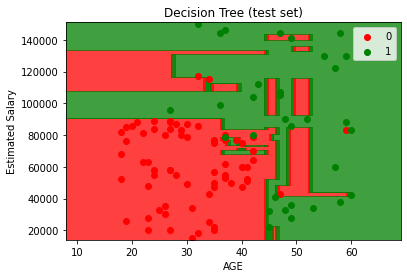

In [30]:
from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_test),y_test
x1,x2= np.meshgrid(np.arange(start = x_set[:,0].min()-10,stop = x_set[:,0].max()+10,step=1),
                   np.arange(start =x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step=1))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.75 ,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (test set)')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()